In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
#test data
test_df = pd.read_csv("test_df.csv")
features = list(test_df.drop(['is_corona_positive'], axis=1).columns.values)

# Drop Y column
X_test = test_df.drop(['is_corona_positive'], axis=1).to_numpy()
y_test = test_df.is_corona_positive.astype(int).to_numpy()

#train data
train_df = pd.read_csv("train_df.csv")
# Drop Y column
X_train = train_df.drop(['is_corona_positive'], axis=1).to_numpy()
y_train = train_df.is_corona_positive.astype(int).to_numpy()

#test data
valid_df = pd.read_csv("valid_df.csv")
# Drop Y column
X_valid = valid_df.drop(['is_corona_positive'], axis=1).to_numpy()
y_valid = valid_df.is_corona_positive.astype(int).to_numpy()

In [3]:
#Create Support Vector Classifier model with default parameters and train on training data
SVC_model = SVC(random_state=42).fit(X_train, y_train)
#predicted y for training set
y_pred_train = SVC_model.predict(X_train)
# predicted y for test set
y_pred_test = SVC_model.predict(X_test)
# tuple of precision, recall, f1 and support for training set
res_train = precision_recall_fscore_support(y_train, y_pred_train)
# tuple of precision, recall, f1 and support for test set
res_test = precision_recall_fscore_support(y_test, y_pred_test)

#display key metrics
print('The accuracy for the training set is {:.2f} \nThe accuracy for the test set is {:.2f}'.format(
    accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)))
print('The F1 score for the training set is {:.2f} \nThe F1 score for the test set is {:.2f}'.format(
    f1_score(y_train, y_pred_train, average = 'macro'), f1_score(y_test, y_pred_test, average = 'macro')))
print('For the COVID Negative class the precision is {:.2f} for the training set and it is {:.2f} on the test set'.format(
    res_train[0][0], res_test[0][0]))
print('For the COVID positive class the recall is {:.2f} for the training set and it is {:.2f} on the test set'.format(
    res_train[1][0], res_test[1][0]))
print('For the COVID Positive class the precision is {:.2f} for the training set and it is {:.2f} on the test set'.format(
    res_train[0][1], res_test[0][1]))
print('For the COVID Negative class the recall is {:.2f} for the training set and it is {:.2f} on the test set'.format(
    res_train[1][1], res_test[1][1]))



The accuracy for the training set is 1.00 
The accuracy for the test set is 0.97
The F1 score for the training set is 1.00 
The F1 score for the test set is 0.83
For the COVID Negative class the precision is 1.00 for the training set and it is 0.98 on the test set
For the COVID positive class the recall is 1.00 for the training set and it is 0.99 on the test set
For the COVID Positive class the precision is 0.99 for the training set and it is 0.72 on the test set
For the COVID Negative class the recall is 1.00 for the training set and it is 0.65 on the test set


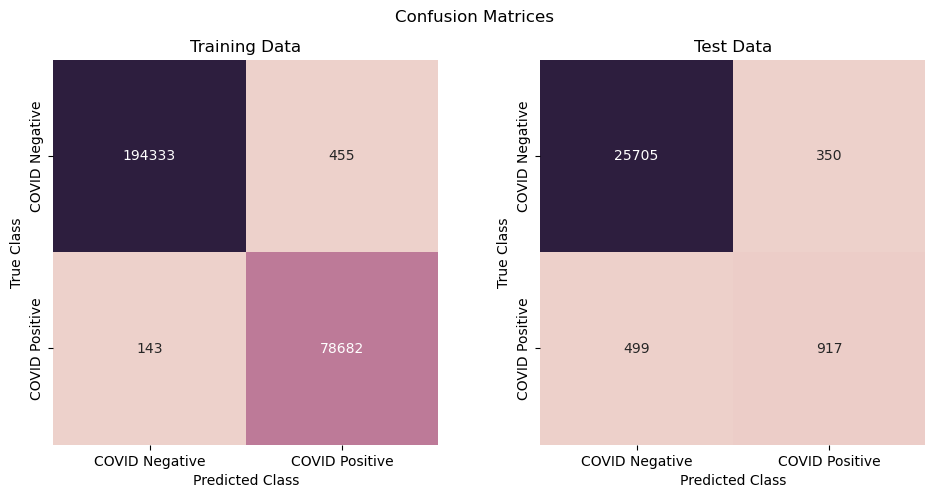

In [4]:
# function to plot confusion matrices
def plot_cnf(y_true, y_pred, ax, title):
    labs = ['COVID Negative', 'COVID Positive']
    conf_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_mat,annot=True,fmt='d',cbar=False, xticklabels= labs, yticklabels= labs,ax = ax,
                square = True, cmap=sns.cubehelix_palette(as_cmap=True))
    ax.set_ylabel('True Class')
    ax.set_xlabel('Predicted Class')
    ax.set_title(title)
# Generate figure with 2 subplots
fig, axs =  plt.subplots(1,2, figsize = (12,5))
# plot confusion matrices
plot_cnf(y_train, y_pred_train, axs[0], "Training Data")
plot_cnf(y_test, y_pred_test, axs[1], "Test Data")
fig.suptitle('Confusion Matrices')
fig.subplots_adjust(wspace=0.1)
plt.show()

In [5]:
# Define parameter grid to explore
param_grid = {'C': [0.01, 0.1,1, 10,100], 'gamma': [ 1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}

#grid search
grid = GridSearchCV(SVC(random_state=42), param_grid, scoring = 'f1_macro',  cv = 5, refit = True)
  
# fitting the model for grid search
grid.fit(X_valid, y_valid)
# print best parameter after tuning
print('The best hyperparmeters are:',grid.best_params_)
print('The best hyperparamter combination had a mean F1 score of {:.3f}'.format(grid.best_score_))

In [ ]:
y_pred_valid = grid.predict(X_valid)
# predicted y for test set
y_pred_test_tuned = grid.predict(X_test)
# tuple of precision, recall, f1 and support for training set
res_valid = precision_recall_fscore_support(y_valid, y_pred_valid)
# tuple of precision, recall, f1 and support for test set
res_test_tuned = precision_recall_fscore_support(y_test, y_pred_test_tuned)

#display key metrics
print('The accuracy for the validation set is {:.2f} \nThe accuracy for the test set is {:.2f}'.format(
    accuracy_score(y_valid, y_pred_valid), accuracy_score(y_test, y_pred_test_tuned)))
print('The F1 score for the validation set is {:.2f} \nThe F1 score for the test set is {:.2f}'.format(
    f1_score(y_valid, y_pred_valid, average = 'macro'), f1_score(y_test, y_pred_test_tuned, average = 'macro')))
print('For the COVID Negative class the precision is {:.2f} for the validation set and it is {:.2f} on the test set'.format(
    res_valid[0][0], res_test_tuned[0][0]))
print('For the COVID positive class the recall is {:.2f} for the validation set and it is {:.2f} on the test set'.format(
    res_valid[1][0], res_test_tuned[1][0]))
print('For the COVID Positive class the precision is {:.2f} for the validation set and it is {:.2f} on the test set'.format(
    res_valid[0][1], res_test_tuned[0][1]))
print('For the COVID Negative class the recall is {:.2f} for the validation set and it is {:.2f} on the test set'.format(
    res_valid[1][1], res_test_tuned[1][1]))

In [ ]:
def plot_metrics(data, ax, metric):
    classes = ('COVID Negative', 'COVID Positive')
    x = np.arange(len(classes))
    multiplier = 0
    for var, value in data.items():
        offset = multiplier * 0.25
        ax.bar(x + offset, value, 0.25, label=var)
        multiplier += 1
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.set_xticks(ticks = [0.25, 1.25])
    ax.set_xticklabels(labels = classes)
    ax.set_ylim(0, 1)

fig, axs = plt.subplots(2,3, figsize = (18, 10))
# data for weighted F1 score
f1_data = [f1_score(y_train, y_pred_train, average = 'macro'),f1_score(y_test, y_pred_test, average = 'macro'),f1_score(y_test, y_pred_test_tuned, average = 'macro')]
# plot weighted F1 score
axs[0,0].bar([1,2,3], f1_data,color = ['C0', 'C1', 'C2'])
axs[0,0].set_ylim(0, 1)
axs[0,0].set_ylabel('F1 Score')
axs[0,0].set_title('F1 Score')
axs[0,0].set_xticks(ticks = [1,2,3])
axs[0,0].set_xticklabels(labels = ['Untuned - Train', 'Untuned - Test', 'Tuned -Test'])
#plot precision
plot_metrics({'Untuned - Training': res_train[0],'Untuned- Test': res_test[0],'Tuned - Test': res_test_tuned[0]}, axs[0,1], 'Precision')
#plot recall
plot_metrics({'Untuned - Training': res_train[1],'Untuned- Test': res_test[1],'Tuned - Test': res_test_tuned[1]}, axs[0,2], 'Recall')
#plot legend for last subplot of row 
axs[0,2].legend(loc='upper left')
# plot confusion matrices
plot_cnf(y_train, y_pred_train, axs[1,0], 'Confusion Matrix: Untuned Model - Training Data')
plot_cnf(y_test, y_pred_test, axs[1,1], 'Confusion Matrix: Untuned Model - Test Data')
plot_cnf(y_test, y_pred_test_tuned, axs[1,2], 'Confusion Matrix: Tuned Model - Test Data')

fig.subplots_adjust(wspace=0.2)
plt.show()
